In [825]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [826]:
cust_demo = pd.read_csv('customerdemo.csv')
new_cust = pd.read_csv('newcustomer.csv')

In [827]:
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9


In [828]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3996 non-null   int64  
 1   first_name                           3996 non-null   object 
 2   last_name                            3871 non-null   object 
 3   gender                               3996 non-null   object 
 4   past_3_years_bike_related_purchases  3996 non-null   int64  
 5   DOB                                  3909 non-null   object 
 6   job_title                            3492 non-null   object 
 7   job_industry_category                3341 non-null   object 
 8   wealth_segment                       3996 non-null   object 
 9   deceased_indicator                   3996 non-null   object 
 10  owns_car                             3996 non-null   object 
 11  tenure                        

In [829]:
new_cust.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,4001,Chickie,Brister,Male,86,7/12/1957,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,4002,Morly,Genery,Male,69,3/22/1970,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,4003,Ardelis,Forrester,Female,10,8/28/1974,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,4004,Lucine,Stutt,Female,64,1/28/1979,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,4005,Melinda,Hadlee,Female,34,9/21/1965,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [830]:
new_cust.isnull().sum()

customer_id                              0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

## replace dob with age

In [831]:
cust_demo['DOB'] = pd.to_datetime(cust_demo['DOB'])
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3996 non-null   int64         
 1   first_name                           3996 non-null   object        
 2   last_name                            3871 non-null   object        
 3   gender                               3996 non-null   object        
 4   past_3_years_bike_related_purchases  3996 non-null   int64         
 5   DOB                                  3909 non-null   datetime64[ns]
 6   job_title                            3492 non-null   object        
 7   job_industry_category                3341 non-null   object        
 8   wealth_segment                       3996 non-null   object        
 9   deceased_indicator                   3996 non-null   object        
 10  owns_car    

In [832]:
new_cust['DOB'] = pd.to_datetime(new_cust['DOB'])
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          1000 non-null   int64         
 1   first_name                           1000 non-null   object        
 2   last_name                            971 non-null    object        
 3   gender                               1000 non-null   object        
 4   past_3_years_bike_related_purchases  1000 non-null   int64         
 5   DOB                                  983 non-null    datetime64[ns]
 6   job_title                            894 non-null    object        
 7   job_industry_category                835 non-null    object        
 8   wealth_segment                       1000 non-null   object        
 9   deceased_indicator                   1000 non-null   object        
 10  owns_car     

In [841]:
today = pd.to_datetime('today')
diff_y = today.year -cust_demo['DOB'].dt.year
# Haven't had birthday
b_md = cust_demo['DOB'].apply(lambda x: (x.month,x.day) )
no_birthday = b_md > (today.month,today.day)
cust_demo['age'] = diff_y - no_birthday
cust_demo[:1][:]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,67.0


In [842]:
today = pd.to_datetime('today')
diff_y = today.year -new_cust['DOB'].dt.year
# Haven't had birthday
b_md = new_cust['DOB'].apply(lambda x: (x.month,x.day) )
no_birthday = b_md > (today.month,today.day)
new_cust['age'] = diff_y - no_birthday
new_cust[:1][:]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875,63.0


In [843]:
today

Timestamp('2021-06-13 09:07:24.230640')

In [845]:
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,67.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,40.0
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,59.0
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4,44.0
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,54.0


In [846]:
new_cust.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,63.0
1,4002,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,51.0
2,4003,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,46.0
3,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,42.0
4,4005,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,55.0


In [847]:
cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              504
job_industry_category                  655
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
age                                     87
dtype: int64

In [848]:
cust_demo['age'].fillna(cust_demo['age'].mode()[0],inplace=True)
new_cust['age'].fillna(new_cust['age'].mode()[0],inplace=True)
new_cust['gender']=new_cust['gender'].replace('U','Unspecified')
new_cust['gender'].value_counts()

Female         513
Male           470
Unspecified     17
Name: gender, dtype: int64

In [849]:
new_cust.isnull().sum()

customer_id                              0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
age                                      0
dtype: int64

fill all categorical columns having null values with mode valus of respective column as they are small compared to whole

In [851]:
null_cols=['job_title','job_industry_category','tenure']
for feature in null_cols:
    cust_demo[feature].fillna(cust_demo[feature].mode()[0],inplace=True)
nulls_in_new=['job_title','job_industry_category']
for feature in nulls_in_new:
    new_cust[feature].fillna(new_cust[feature].mode()[0],inplace=True)

# DATA EXPLORATION

In [852]:
cols_to_drop =['first_name','last_name','DOB']
cols_to_drop_in_new=['first_name','last_name','DOB']

In [853]:
custdemovis= cust_demo.copy()
custdemovis= cust_demo.drop(cols_to_drop,axis=1)
newcustvis=new_cust.drop(cols_to_drop,axis=1)

In [854]:
custdemovis.isnull().sum(),newcustvis.isnull().sum()

(customer_id                            0
 gender                                 0
 past_3_years_bike_related_purchases    0
 job_title                              0
 job_industry_category                  0
 wealth_segment                         0
 deceased_indicator                     0
 owns_car                               0
 tenure                                 0
 address                                0
 postcode                               0
 state                                  0
 country                                0
 property_valuation                     0
 age                                    0
 dtype: int64,
 customer_id                            0
 gender                                 0
 past_3_years_bike_related_purchases    0
 job_title                              0
 job_industry_category                  0
 wealth_segment                         0
 deceased_indicator                     0
 owns_car                               0
 tenure            

In [855]:
custdemovis=custdemovis.sort_values(by='age',ascending=False)
##remove that outlier ,person with age 178,maybe wrong age,so replace it with around 60 because tenure is more
custdemovis['age'][29]=70

<ipython-input-855-942b578bec94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custdemovis['age'][29]=70


In [693]:
custdemovis.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
29,34,Unspecified,59,Legal Assistant,IT,Affluent Customer,N,No,20.0,833 Luster Way,4005,QLD,Australia,8,70.0
715,720,Male,67,Recruiting Manager,Retail,Affluent Customer,N,No,6.0,78 Glacier Hill Drive,2026,NSW,Australia,10,90.0
1087,1092,Female,56,VP Quality Control,Retail,Mass Customer,N,No,5.0,5515 Artisan Center,3337,VIC,Australia,3,86.0
3405,3410,Female,93,Business Systems Development Analyst,Property,Mass Customer,N,No,16.0,1351 Lunder Road,2049,NSW,Australia,10,81.0
2408,2413,Male,27,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0,423 Debra Terrace,3082,VIC,Australia,8,78.0


In [856]:
newcustvis=newcustvis.sort_values(by='age',ascending=False)


In [857]:
custdemovis.age.value_counts()

43.0    323
44.0    174
42.0    161
47.0    141
46.0    134
45.0    123
40.0    122
41.0    105
35.0    105
34.0     93
26.0     91
31.0     84
56.0     80
49.0     80
23.0     79
61.0     78
59.0     78
33.0     77
62.0     76
48.0     75
25.0     74
52.0     74
22.0     73
51.0     73
55.0     72
28.0     70
54.0     70
36.0     69
57.0     68
53.0     67
64.0     65
27.0     63
66.0     62
63.0     62
24.0     62
32.0     61
65.0     60
50.0     59
39.0     59
58.0     58
21.0     58
29.0     57
60.0     55
67.0     45
38.0     40
30.0     40
20.0     39
37.0     34
19.0     22
77.0      2
85.0      1
70.0      1
80.0      1
89.0      1
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

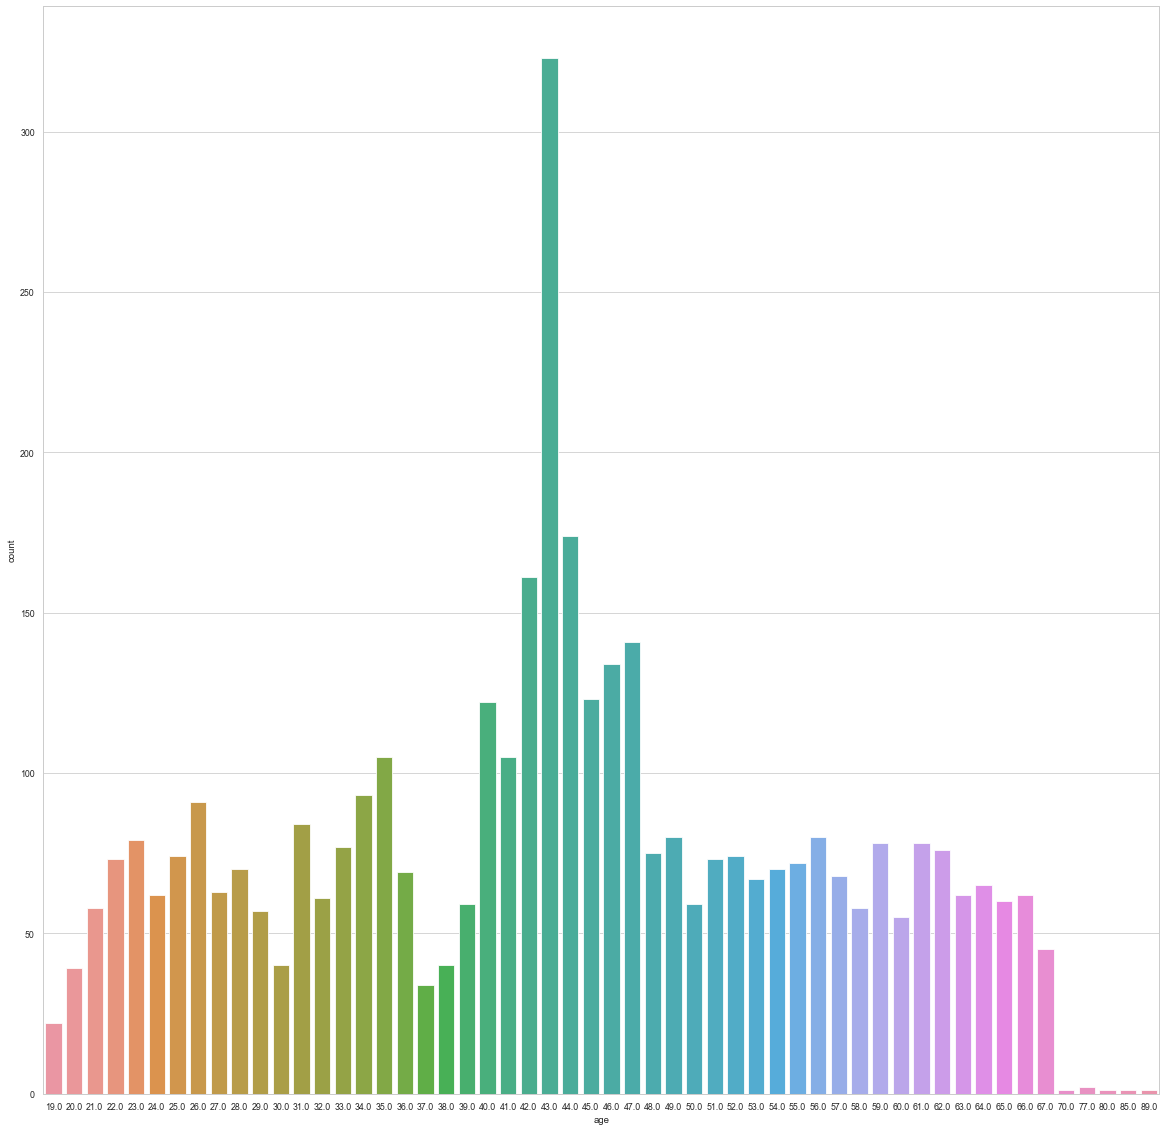

In [858]:
sns.set_context("paper", font_scale=1)
fig_dims = (20,20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = "age",ax=ax, data=custdemovis)

<AxesSubplot:xlabel='age', ylabel='count'>

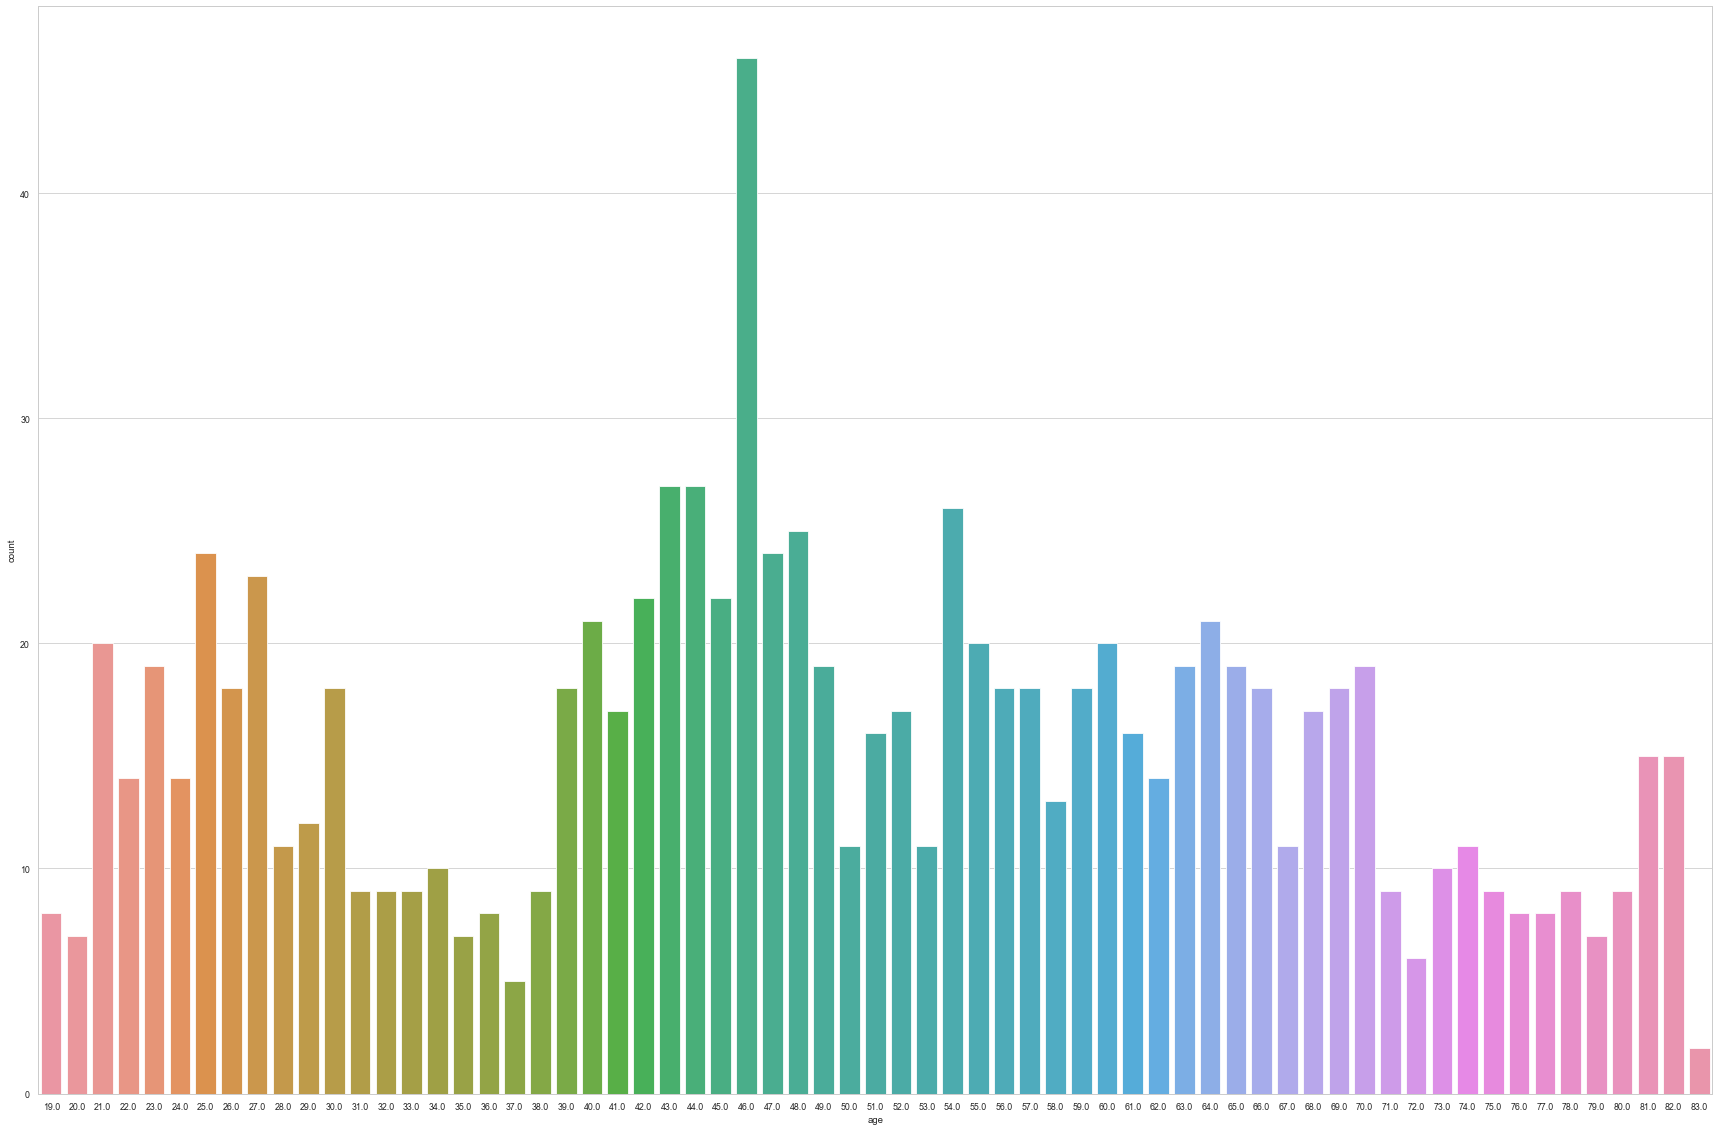

In [859]:
fig_dims = (30,20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = "age",ax=ax, data=newcustvis)

In [860]:
custdemovis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 29 to 2291
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3996 non-null   int64  
 1   gender                               3996 non-null   object 
 2   past_3_years_bike_related_purchases  3996 non-null   int64  
 3   job_title                            3996 non-null   object 
 4   job_industry_category                3996 non-null   object 
 5   wealth_segment                       3996 non-null   object 
 6   deceased_indicator                   3996 non-null   object 
 7   owns_car                             3996 non-null   object 
 8   tenure                               3996 non-null   float64
 9   address                              3996 non-null   object 
 10  postcode                             3996 non-null   int64  
 11  state                        

In [861]:
## grouping ages with ranges mentioned below
bins= [0,30,40,50,68,100]
labels = ['below-30','30-40','40-50','50-68','above_68']
combine =[custdemovis,newcustvis]
for dataset in combine:
    dataset['age'] =pd.to_numeric(dataset['age'])
    dataset['age'] = pd.cut(dataset['age'], bins=bins, labels=labels, right=False)

In [862]:
custdemovis.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
29,34,Unspecified,59,Legal Assistant,IT,Affluent Customer,N,No,20.0,833 Luster Way,4005,QLD,Australia,8,above_68
715,720,Male,67,Recruiting Manager,Retail,Affluent Customer,N,No,6.0,78 Glacier Hill Drive,2026,NSW,Australia,10,above_68
1087,1092,Female,56,VP Quality Control,Retail,Mass Customer,N,No,5.0,5515 Artisan Center,3337,VIC,Australia,3,above_68
3405,3410,Female,93,Business Systems Development Analyst,Property,Mass Customer,N,No,16.0,1351 Lunder Road,2049,NSW,Australia,10,above_68
653,658,Male,38,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0,355 Thackeray Circle,3025,Victoria,Australia,9,above_68


In [863]:
custdemovis['job_title'].nunique(),newcustvis['job_title'].nunique()
#all job holders are really different people

(195, 184)

In [864]:
custdemovis['job_industry_category'].nunique(),newcustvis['job_industry_category'].nunique()

(9, 9)

for dataset in combine:
    dataset.age = dataset.age.map({0:'below 25', 1:'25-35', 2:'35-50',3:'50-60',4:'ab0ve 60'})

In [865]:
newcustvis.age.value_counts()

50-68       306
40-50       250
above_68    172
below-30    170
30-40       102
Name: age, dtype: int64

In [866]:
custdemovis.age.value_counts()

40-50       1438
50-68       1202
below-30     688
30-40        662
above_68       6
Name: age, dtype: int64

In [867]:
custdemovis.wealth_segment.value_counts(),newcustvis.wealth_segment.value_counts()

(Mass Customer        1997
 High Net Worth       1020
 Affluent Customer     979
 Name: wealth_segment, dtype: int64,
 Mass Customer        508
 High Net Worth       251
 Affluent Customer    241
 Name: wealth_segment, dtype: int64)

In [569]:
newcustvis.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
406,4407,Male,21,Graphic Designer,Health,Mass Customer,N,No,19,082 Welch Lane,2089,NSW,Australia,11,405,0.930000,above_68
265,4266,Female,56,Associate Professor,Financial Services,Mass Customer,N,No,10,343 Lakewood Center,2089,NSW,Australia,12,259,1.062500,above_68
585,4586,Female,27,Web Developer II,Manufacturing,Affluent Customer,N,No,15,95796 Mcbride Drive,3677,VIC,Australia,3,583,0.787500,above_68
191,4192,Male,55,Clinical Specialist,Health,Mass Customer,N,Yes,7,6966 Delladonna Street,2250,NSW,Australia,8,191,1.150000,above_68
414,4415,Male,37,Associate Professor,Manufacturing,Mass Customer,N,No,9,79 Armistice Junction,2765,NSW,Australia,9,415,0.921875,above_68


In [908]:
custdemovis.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
29,34,Unspecified,59,Legal Assistant,IT,Affluent Customer,N,No,20.0,833 Luster Way,4005,QLD,Australia,8,above_68
715,720,Male,67,Recruiting Manager,Retail,Affluent Customer,N,No,6.0,78 Glacier Hill Drive,2026,NSW,Australia,10,above_68
1087,1092,Female,56,VP Quality Control,Retail,Mass Customer,N,No,5.0,5515 Artisan Center,3337,VIC,Australia,3,above_68
3405,3410,Female,93,Business Systems Development Analyst,Property,Mass Customer,N,No,16.0,1351 Lunder Road,2049,NSW,Australia,10,above_68
653,658,Male,38,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0,355 Thackeray Circle,3025,Victoria,Australia,9,above_68


### we got cleaned data
- now we have to compare data with old and new customers and note the observations

In [915]:
old= sum(custdemovis['past_3_years_bike_related_purchases'])//custdemovis.shape[0]
old

48

In [916]:
new=sum(newcustvis['past_3_years_bike_related_purchases'])//newcustvis.shape[0]
new

49

In [926]:
prod_per_cust=pd.DataFrame({"type":['custdemo','newcust'],'products':[old,new]})
prod_per_cust

,type,products
0,custdemo,48
1,newcust,49


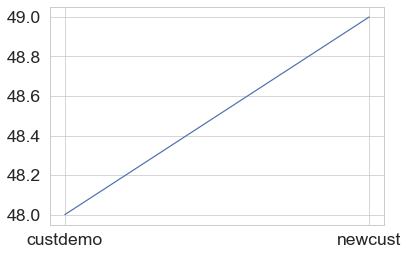

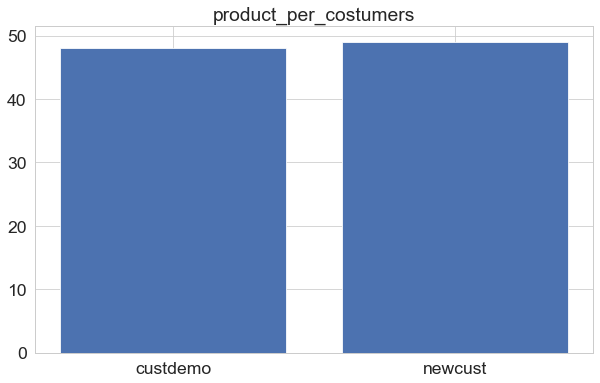

In [941]:
x = prod_per_cust['type']
y =prod_per_cust['products']
plt.plot(x,y)
#plt.xticks([47,48,49,50])
# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))
# Create bar plot
ax.bar(x,y)
plt.title('product_per_costumers')
plt.show()

### age

In [868]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

C:\Users\charan varma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


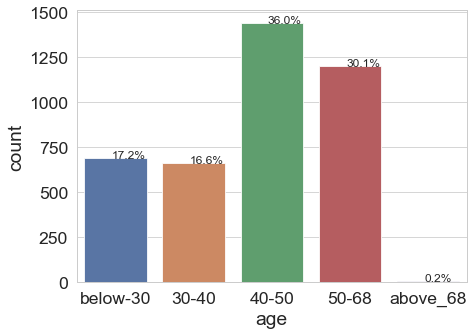

In [869]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(7,5))
ax=sns.countplot('age',data=custdemovis)
without_hue(ax,custdemovis.age)

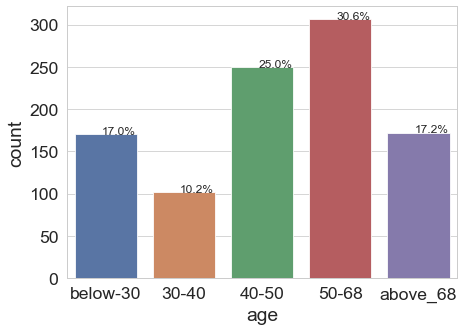

In [870]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(7,5))
ax=sns.countplot('age',data=newcustvis)
without_hue(ax,newcustvis.age)

### job category

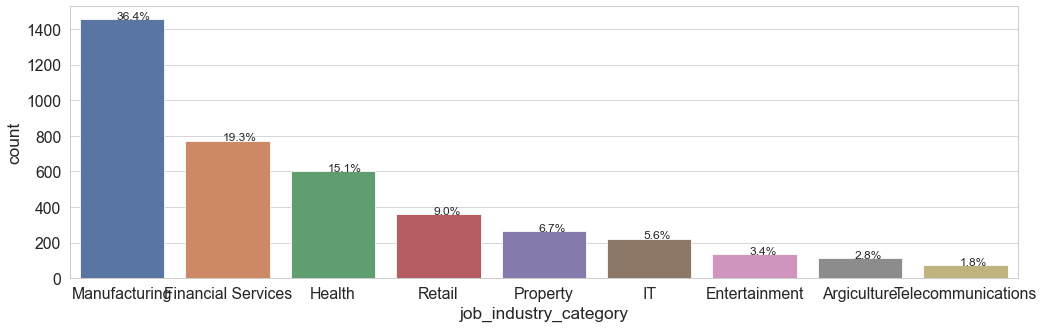

In [871]:
sns.set_context("paper", font_scale=1.8)
plt.figure(figsize=(17,5))
ax=sns.countplot('job_industry_category',data=custdemovis,order = custdemovis['job_industry_category'].value_counts().index)
without_hue(ax,custdemovis.job_industry_category)

In [878]:
newcustvis['job_industry_category'].value_counts()

Financial Services    368
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

C:\Users\charan varma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


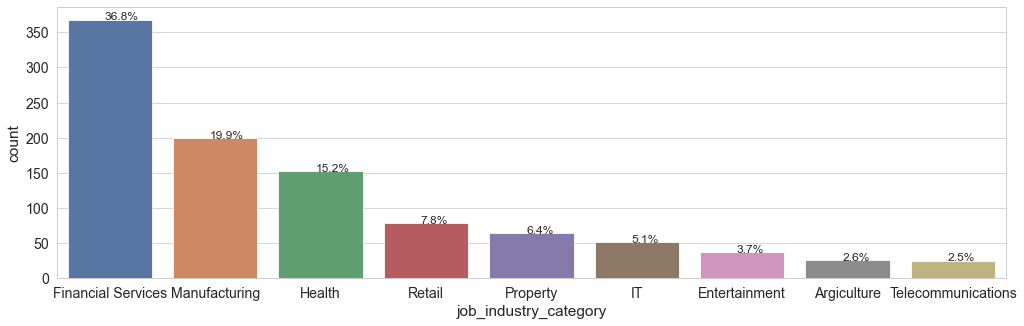

In [882]:

sns.set_context("paper", font_scale=1.6)
plt.figure(figsize=(17,5))
ax=sns.countplot('job_industry_category',data=newcustvis,order = newcustvis['job_industry_category'].value_counts().index)

without_hue(ax,newcustvis.job_industry_category)

### gender

In [712]:
sns.color_palette("crest", as_cmap=True)

In [713]:
custdemovis['gender'].value_counts()

Female         2037
Male           1871
Unspecified      88
Name: gender, dtype: int64

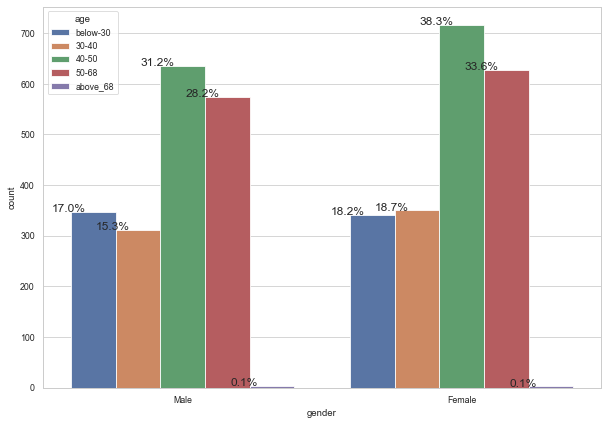

In [892]:
order =['Male','Female']
sns.set_context("paper", font_scale=1)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = "gender",hue='age',ax=ax, data=custdemovis,order=order)
with_hue(ax,custdemovis.gender,2,5)

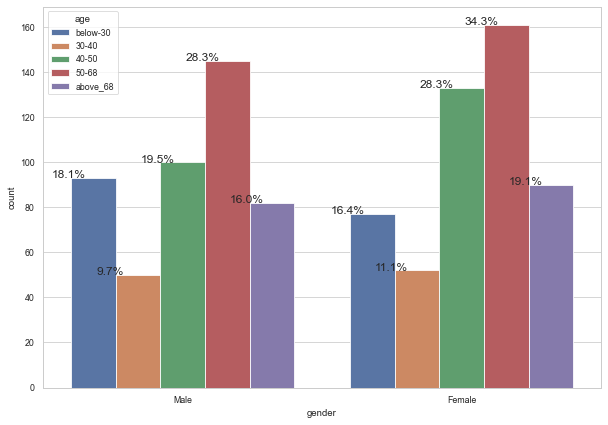

In [899]:
sns.set_context("paper", font_scale=1)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = "gender",hue='age',ax=ax, data=newcustvis,order=order)
with_hue(ax,newcustvis.gender,2,5)

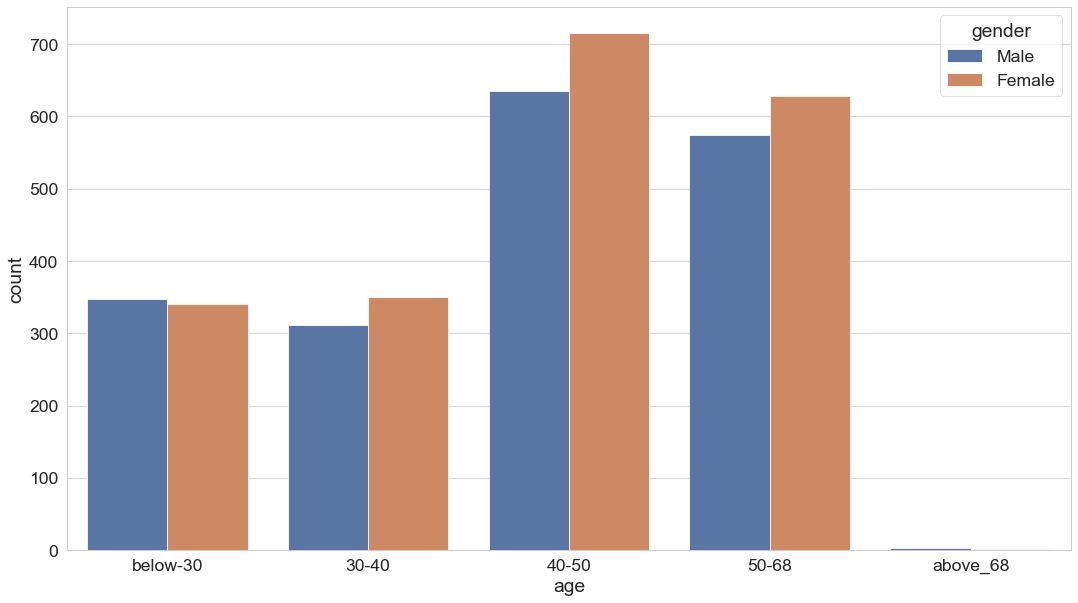

In [946]:
hue_order_genders =['Male','Female']
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(18,10))
ax=sns.countplot('age',hue='gender',hue_order=hue_order_genders,data=custdemovis)


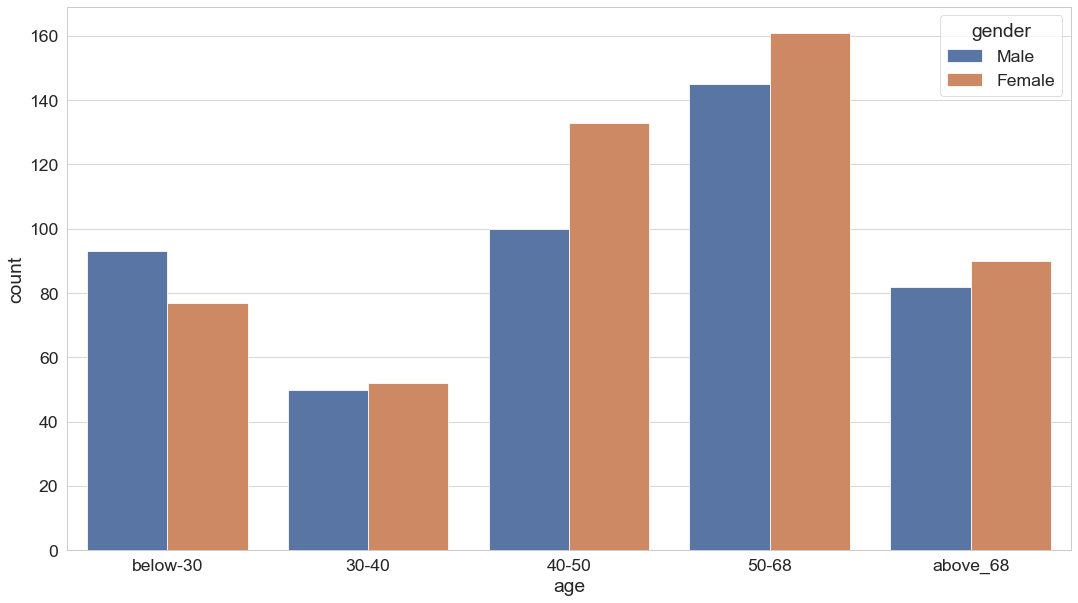

In [947]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(18,10))
ax=sns.countplot('age',hue='gender',hue_order=hue_order_genders,data=newcustvis)

## wealthsegment

In [670]:
newcustvis.wealth_segment.value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

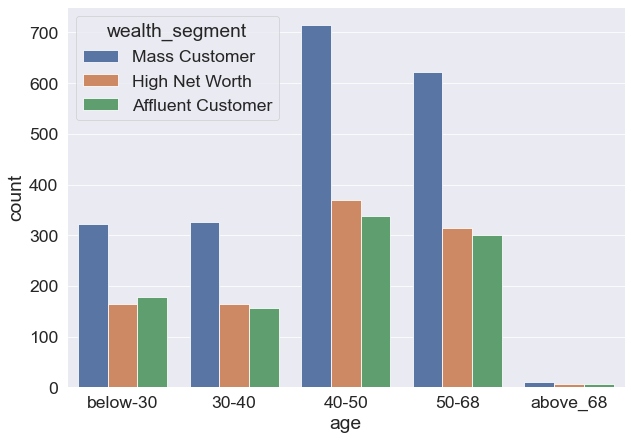

In [685]:
sns.set_context("paper", font_scale=2)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)
hue_order=['Mass Customer','High Net Worth','Affluent Customer']
sns.countplot(x = "age",hue='wealth_segment',ax=ax, data=custdemovis,hue_order=hue_order)

<AxesSubplot:xlabel='age', ylabel='count'>

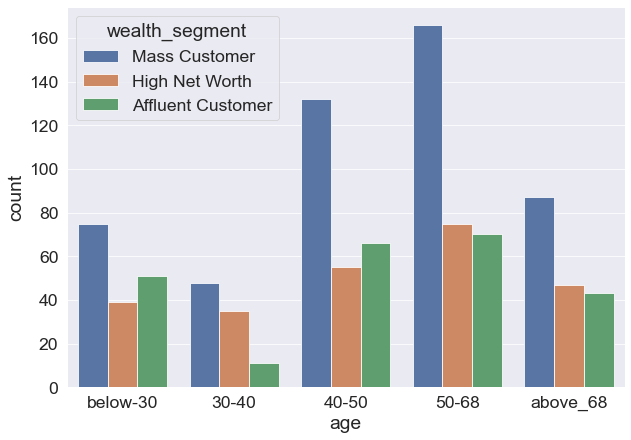

In [684]:
sns.set_context("paper", font_scale=2)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = "age",hue='wealth_segment',ax=ax, data=newcustvis,hue_order=hue_order)

## purchases  in last 3 years

In [721]:
custdemovis.shape

(3996, 15)

In [732]:
newcustvis.shape

(1000, 17)

In [742]:
M=0
F=0
U=0
for i in range(3996):
    if custdemovis['gender'][i]=='Male':
        M +=custdemovis['past_3_years_bike_related_purchases'][i]
    elif custdemovis['gender'][i]=='Female':
        F +=custdemovis['past_3_years_bike_related_purchases'][i]
    else:
        U +=custdemovis['past_3_years_bike_related_purchases'][i]
old_purchases = pd.DataFrame({'purchased_by':['purchases_by_male','purchases_by_female','purchasesunspecific'],'quantity':[M,F,U]})
old_purchases

,purchased_by,quantity
0,purchases_by_male,93379
1,purchases_by_female,98231
2,purchasesunspecific,3718


In [743]:
M=0
F=0
U=0
for i in range(1000):
    if newcustvis['gender'][i]=='Male':
        M +=newcustvis['past_3_years_bike_related_purchases'][i]
    elif newcustvis['gender'][i]=='Female':
        F +=newcustvis['past_3_years_bike_related_purchases'][i]
    else:
        U +=newcustvis['past_3_years_bike_related_purchases'][i]
new_purchases =pd.DataFrame({'purchased_by':['purchases_by_male','purchases_by_female','purchasesunspecific'],'quantity':[M,F,U]})
new_purchases

,purchased_by,quantity
0,purchases_by_male,23765
1,purchases_by_female,25212
2,purchasesunspecific,859


<AxesSubplot:xlabel='purchased_by', ylabel='quantity'>

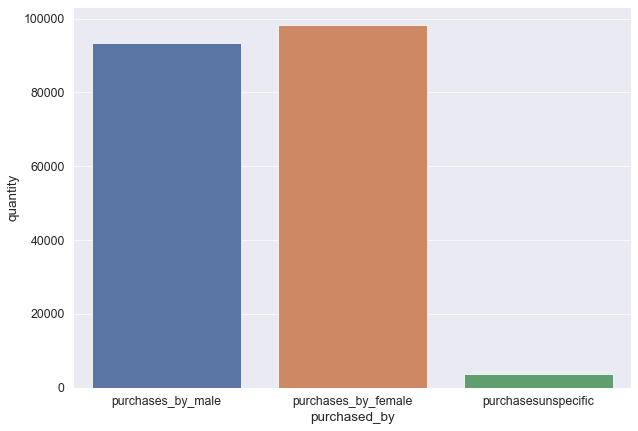

In [769]:
sns.set_context("paper", font_scale=1.4)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='purchased_by',y='quantity',data=old_purchases)



<AxesSubplot:xlabel='purchased_by', ylabel='quantity'>

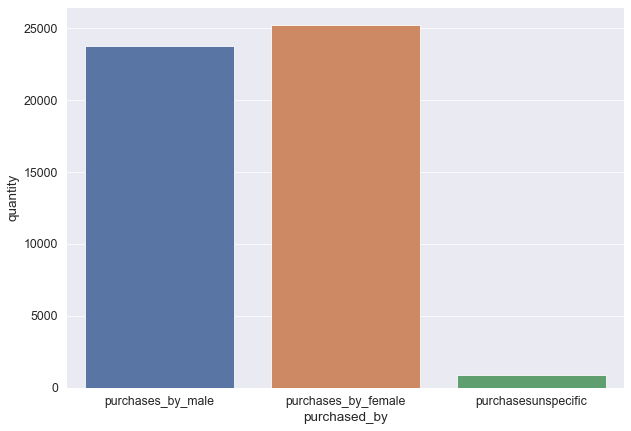

In [770]:
sns.set_context("paper", font_scale=1.4)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='purchased_by',y='quantity',data=new_purchases)

In [772]:
custdemovis['state'].value_counts()##from 

NSW                2052
VIC                 939
QLD                 837
New South Wales      86
Victoria             82
Name: state, dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

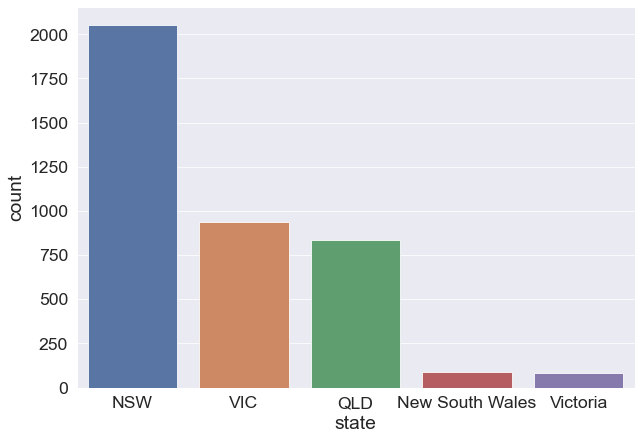

In [779]:
order_states =['NSW','VIC','QLD','New South Wales','Victoria']
sns.set_context("paper", font_scale=2)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = "state",ax=ax, data=custdemovis,order=order_states)

<AxesSubplot:xlabel='state', ylabel='count'>

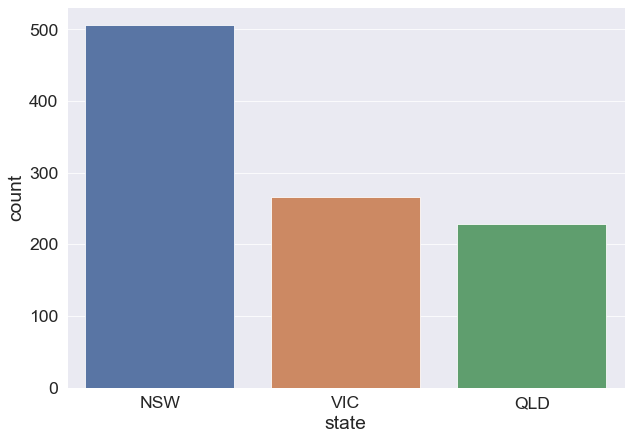

In [781]:
order_new_states =['NSW','VIC','QLD']
sns.set_context("paper", font_scale=2)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = "state",ax=ax, data=newcustvis,order=order_new_states)

<AxesSubplot:xlabel='state', ylabel='count'>

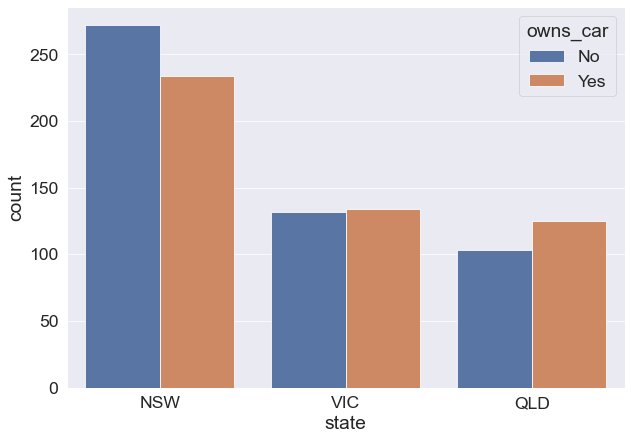

In [782]:
order_new_states =['NSW','VIC','QLD']
sns.set_context("paper", font_scale=2)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = "state",ax=ax, hue='owns_car',data=newcustvis,order=order_new_states)

In [803]:
custdemovis['address'].value_counts().max()

2

In [802]:
newcustvis['address'].value_counts().max()

1

In [799]:
## so max there are only 2 cycles per home

In [800]:
custdemovis['tenure'].value_counts()

7.0     322
5.0     228
11.0    220
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
14.0    200
9.0     200
6.0     192
4.0     191
13.0    191
17.0    182
15.0    178
1.0     165
3.0     160
19.0    159
2.0     150
20.0     95
22.0     55
21.0     54
Name: tenure, dtype: int64

<AxesSubplot:xlabel='past_3_years_bike_related_purchases', ylabel='count'>

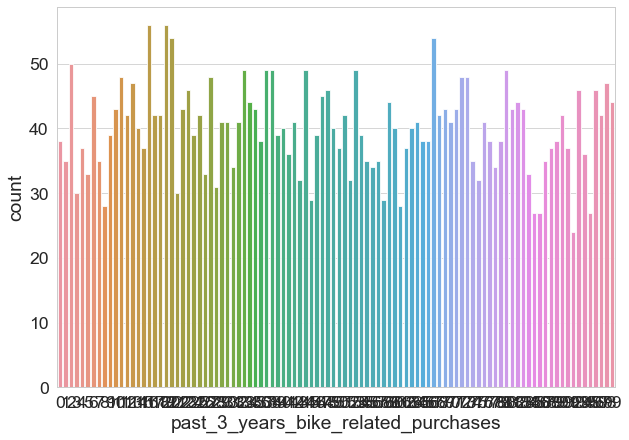

In [949]:

sns.set_context("paper", font_scale=2)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = "past_3_years_bike_related_purchases",ax=ax, data=custdemovis)

C:\Users\charan varma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='past_3_years_bike_related_purchases', ylabel='Density'>

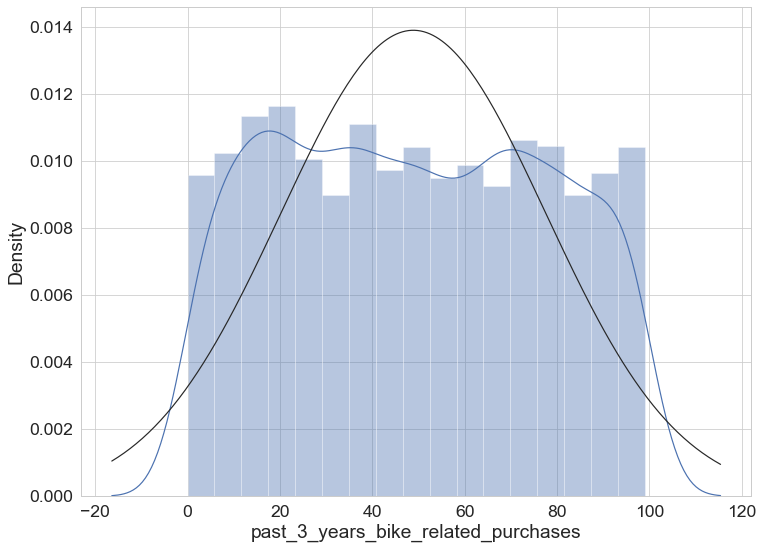

In [952]:
from scipy import stats
plt.subplots(figsize=(12,9))
sns.distplot(custdemovis['past_3_years_bike_related_purchases'], fit=stats.norm)

In [953]:
custdemovis.corr()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation
customer_id,1.000000,-0.001987,-0.019972,0.011370,-0.012311
past_3_years_bike_related_purchases,-0.001987,1.000000,-0.006209,-0.007502,0.009171
tenure,-0.019972,-0.006209,1.000000,-0.002505,-0.004566
postcode,0.011370,-0.007502,-0.002505,1.000000,-0.508519
property_valuation,-0.012311,0.009171,-0.004566,-0.508519,1.000000


<AxesSubplot:>

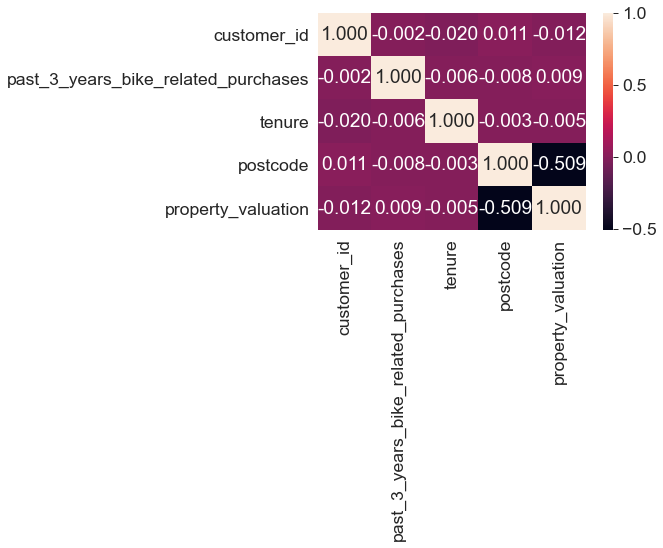

In [956]:
sns.heatmap(custdemovis.corr(), annot=True, fmt= '.3f')